# Imports

In [1]:
import numpy as np
from scipy.io.wavfile import read, write

# Lets make a sound wave!

Sound can be represented as a waveform, showing the displacement of particles in the air (amplitude) in time (t).
$$f(t) = \alpha \cdot \sin (2 \pi t) $$

The human sound range of hearing is from 20 Hz to 20 kHz. Try playing around with these frequencies to see where you stop hearing the sound.

In [14]:
sample_rate = 8000 # 8kHz
duration = 1 # seconds
t = np.linspace(0, duration, int(sample_rate * duration)) # time variable

# to make a sound longer, increase the duration variable

# generate sine wave
frequency = 440 # Hz
sound = 0.5 * np.sin(2 * np.pi * frequency * t)
write('results/sine.wav', sample_rate, sound)

You can use matplotlib to draw out the sine wave

Text(0.5, 1.0, 'Sine Wave')

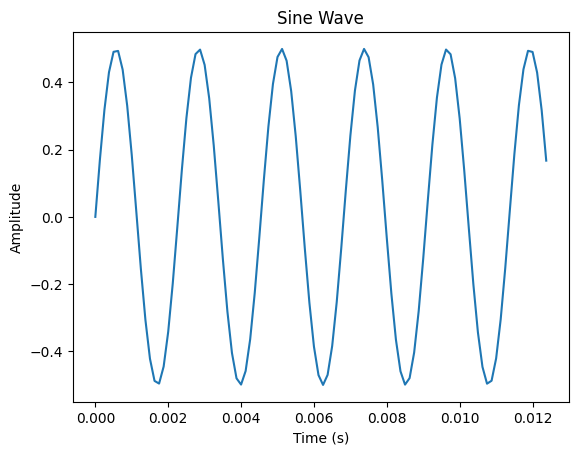

In [20]:
# plot the sine wave, only take the first 100 samples
import matplotlib.pyplot as plt
plt.plot(t[:100], sound[:100])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')

Lets make a melody by stacking the notes one after the other

In [30]:
sound = lambda time, freq, amp = 1: amp * np.sin(2 * np.pi * freq * time)

# lets generate the notes of an A major chord
A_freq = 440
C_freq = 440 * 2 ** (3 / 12)
E_freq = 440 * 2 ** (7 / 12)

A = sound(t, A_freq)
C = sound(t, C_freq)
E = sound(t, E_freq)

melody = np.hstack([A, C, E])
write('results/A_chord_melody.wav', sample_rate, melody)

Now, let's make a chord (hint: stack vertically instead of horizontally)!

Note, we will have to rescale the amplitude to avoid clipping since we are adding multiple waves together.

In [31]:
A = sound(t, A_freq, 0.5)
C = sound(t, C_freq, 0.5)
E = sound(t, E_freq, 0.5)

A_chord = np.vstack([A, C, E]).T
write('results/A_chord_stack.wav', sample_rate, A_chord)

Text(0.5, 1.0, 'A Major Chord Stacked')

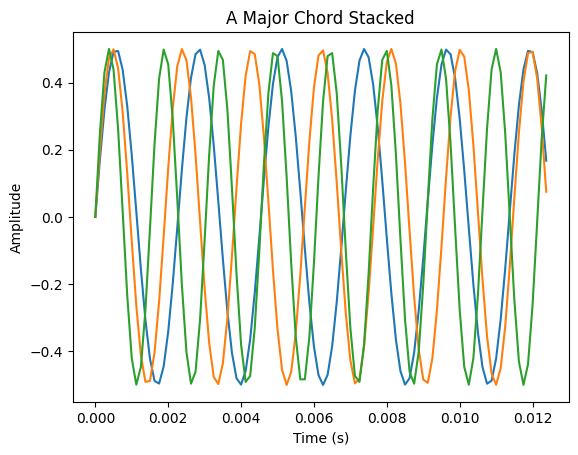

In [37]:
# lets try to see what the A major chord looks like
plt.plot(t[:100], A_chord[:100])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('A Major Chord Stacked')

The issue with this approach is that the sounds may not play on mono (single channel) speakers, instead one note plays on either channels. To fix that, we can add the waves instead of stacking them.

Text(0.5, 1.0, 'A Major Chord Added')

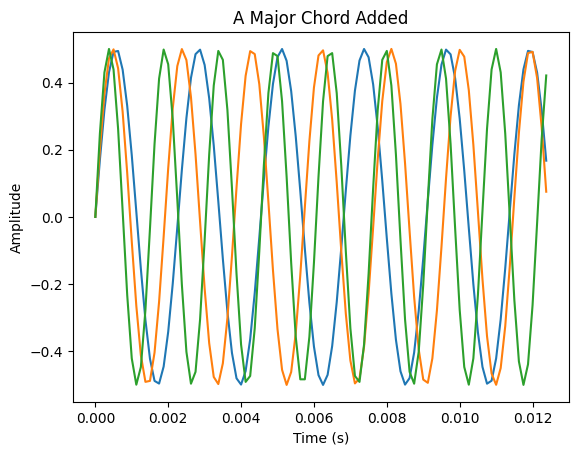

In [38]:
A_chord_interval = A + C + E
write('results/A_chord_interval.wav', sample_rate, A_chord_interval)
plt.plot(t[0:100], A_chord[0:100])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('A Major Chord Added')

Text(0.5, 1.0, 'A Major Chord Added vs Stacked')

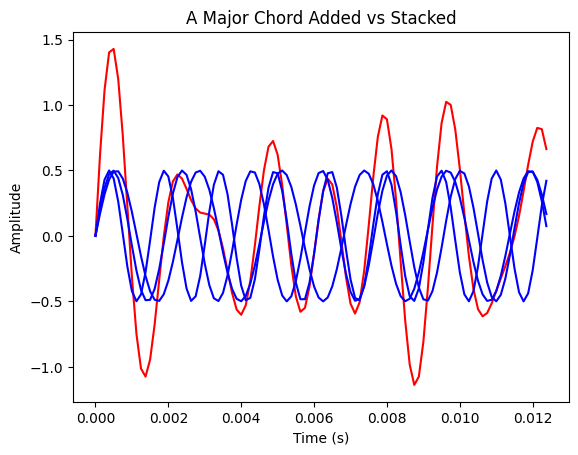

In [41]:
# check the difference between the two
# colour the first plot blue and the second plot red
plt.plot(t[0:100], A_chord_interval[0:100], 'r')
plt.plot(t[0:100], A_chord[0:100], 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('A Major Chord Added vs Stacked')

We notice that the chord created by adding the waves is much more consistent than the one created by stacking. 

Fun fact: Audio producers tend to use 44.1 kHz as the sampling rate. This is because the human ear can hear up to 20 kHz, so the sampling rate should be at least double that. This is known as the Nyquist theorem.  

## Interference

In [33]:
# lets take two sounds that are very close together 
# and see what happens when we add them together

s1 = sound(t, 440, 0.5)
s2 = sound(t, 441, 0.5)

s3 = s1 + s2

write('results/interference.wav', sample_rate, s3)

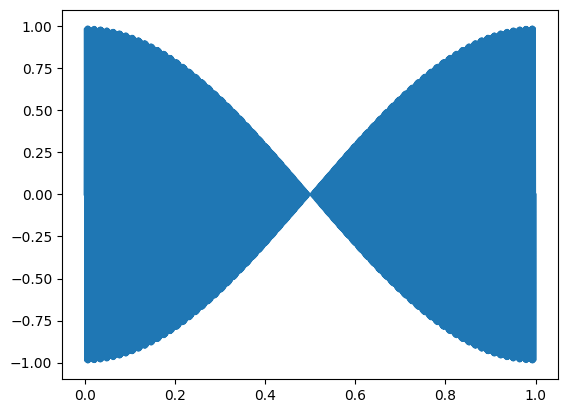

In [35]:
# let us see what the interference looks like
plt.plot(t, s3)

This is why you hear a wobble sound when you play interference.wav. The two waves eventually cancel each other out, and then add up again, and so on. This is known as constructive and destructive interference.

# Reading a file

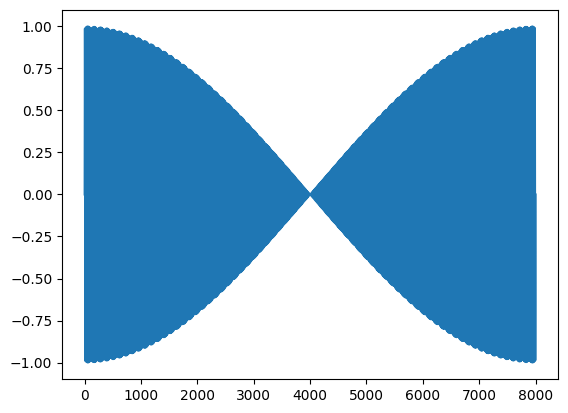

In [40]:
sr, sound = read('results/interference.wav') 
# note, it is important to get both the sample rate and the sound

plt.plot(sound)

# Activity: make a melody

By the next meeting, make a short melody using the sine wave. Feel free to add harmonies, make it as complex as you want.